## **Required Installation**

In [1]:
!pip install -q fastai fastbook nbdev transformers

## **Necessary packages**

In [2]:
import os
import numpy as np
import pandas as pd
from fastai import *
from PIL import Image
from fastbook import *
from fastai.vision.all import *
import matplotlib.pyplot as plt
from distutils.dir_util import copy_tree

## **Initial directory**

In [3]:
%cd /kaggle/input/artwork-title-generator

/kaggle/input/artwork-title-generator


## **Fetching sub-folders**

In [4]:
img_folders = os.listdir()
img_folders.remove('csvFiles')
img_folders.remove('artwork_title_generator_data.csv')
img_folders

['UnitedStates', 'Netherlands', 'China']

## **Copying files to the working directory**

In [5]:
input_path = "/kaggle/input/artwork-title-generator"
output_path = "/kaggle/working/images/"

for folder in img_folders:
    copy_tree(input_path+'/'+folder, output_path+folder)

In [6]:
input_path = "/kaggle/input/artwork-title-generator/csvFiles"
output_path = "/kaggle/working/csvFiles/"

copy_tree(input_path, output_path)

['/kaggle/working/csvFiles/csvFiles/Netherlands.csv',
 '/kaggle/working/csvFiles/csvFiles/China.csv',
 '/kaggle/working/csvFiles/csvFiles/UnitedStates.csv']

## **Working directories initialization**

In [7]:
%cd /kaggle/working/

images_path = "images/"
csv_path = "csvFiles/csvFiles"

/kaggle/working


## **Fetching sub-folders in the working directory**

In [8]:
img_folders = os.listdir(images_path)
img_folders

['UnitedStates', 'China', 'Netherlands']

## **Function to view images distribution**

In [9]:
def plot_images_distribution(dic):
  labels = dic.keys()
  number_of_images = dic.values()
  plt.bar(labels, number_of_images)
  plt.xlabel('Labels')
  plt.xticks(rotation=90)
  plt.ylabel('Number of images')
  plt.title('Images distribiution')
  plt.show()

## **Number of images within folders**

In [10]:
def img_numbers() -> dict: return { folder_name: len(get_image_files_sorted(images_path+'/'+folder_name)) for folder_name in img_folders}

## **Viewing initial images distribution**

{'UnitedStates': 2998, 'China': 3573, 'Netherlands': 2034}


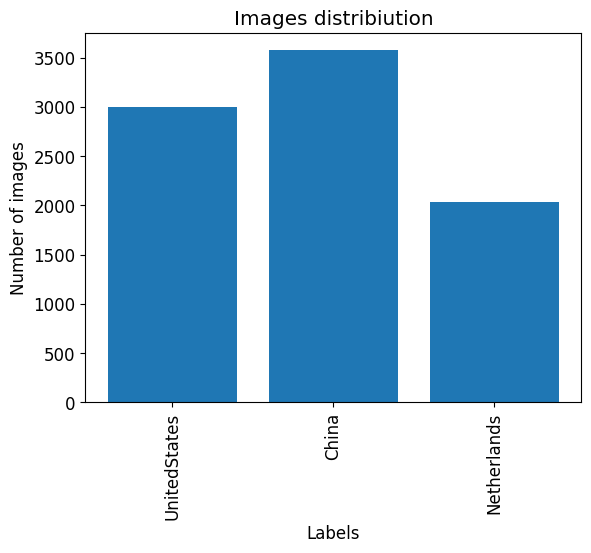

In [11]:
img_dict = img_numbers()
print(img_dict)
plot_images_distribution(img_dict)

## **Function to verify images**

In [12]:
def image_verification(path, folders):
  for folder in folders:
    failed = verify_images(get_image_files_sorted(path+'/'+folder))
    for img in failed:
      os.remove(img)

## **Verifying images**

In [13]:
image_verification(path = images_path, folders = img_folders)

## **Images distribution after cleaning**

{'UnitedStates': 2970, 'China': 3494, 'Netherlands': 2011}


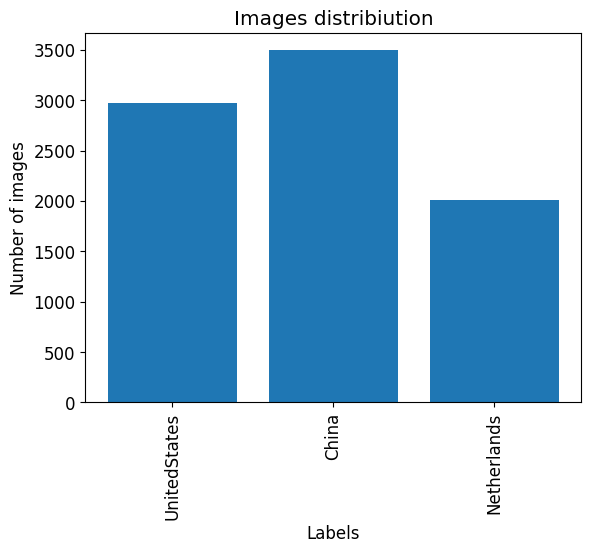

In [14]:
img_dict = img_numbers()
print(img_dict)
plot_images_distribution(img_dict)

## **Identifying grayscale images**

In [15]:
gray_scale_images = [image_path for folder in img_folders for image_path in get_image_files_sorted(images_path+'/'+folder) if np.array(Image.open(image_path)).ndim not in [3,4]]
len(gray_scale_images)

15

## **Removing grayscale images**

In [16]:
for path in gray_scale_images: 
    os.remove(path)

## **Images distribution after removal**

{'UnitedStates': 2964, 'China': 3488, 'Netherlands': 2008}


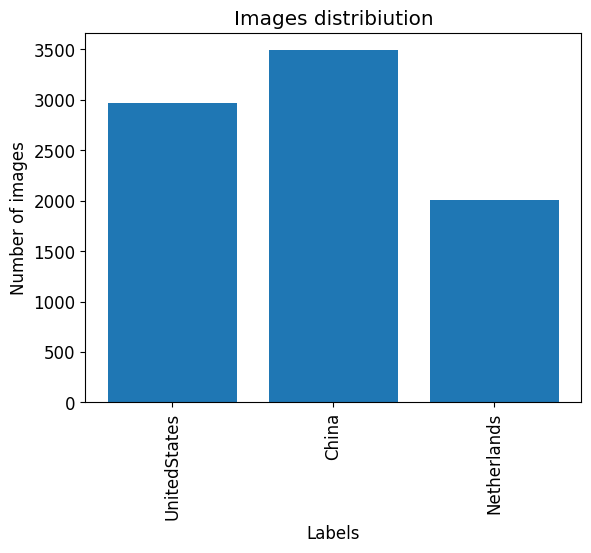

In [17]:
img_dict = img_numbers()
print(img_dict)
plot_images_distribution(img_dict)

## **Fetching csv files**

In [18]:
files = os.listdir(csv_path)
files

['Netherlands.csv', 'China.csv', 'UnitedStates.csv']

## **Merging and creation of a dataframe**

In [19]:
df = pd.DataFrame()
for file in files:
  data_frame = pd.read_csv(f"{csv_path}/{file}")
  df = pd.concat([df, data_frame], ignore_index = True)

## **Viewing dataframe**

In [20]:
df.head()

,ids,artists,mediums,titles,descriptions,urls
0,nl_1,Piet Mondrian,Oil on canvas,"Lozenge Composition with Yellow, Black, Blue, Red, and Gray","Piet Mondrian, a painter of the revolutionary international movement De Stijl (the Style), argued that “the straight line tells the truth.” Why, then, we might wonder, would he choose to hang a painting off axis, where its edges imply dynamic diagonals? Among other motivations, rotating the canvas allowed Mondrian to reconsider a question he spent his career exploring, namely, the relationship between the contents of a painting and what contains them. In Lozenge Composition, the squared-off black lines imply enclosure, while a single line (above the blue area) extends to the slanted edge, ...",https://www.artic.edu/artworks/109819/lozenge-composition-with-yellow-black-blue-red-and-gray
1,nl_2,Jan Sanders van Hemessen,Oil on panel,Judith,"Judith was considered one of the most heroic women of the Old Testament. According to the biblical story, when her city was besieged by the Assyrian army, the beautiful young widow gained access to the quarters of the general Holofernes. After winning his confidence and getting him drunk, she took his sword and cut off his head, thereby saving the Jewish people. Although Judith was often shown richly and exotically clothed, Jan Sanders van Hemessen chose to present her as a monumental nude, aggressively brandishing her sword even after severing Holofernes’s head.Van Hemessen was one of the...",https://www.artic.edu/artworks/4575/judith
2,nl_3,Joachim Antonisz. Wtewael,Oil on copper,The Battle between the Gods and the Giants,"The subject of the victory of the gods of Olympus over the ancient race of giants provided Joachim Wtewael with the opportunity to depict exaggerated athletic poses and striking contrasts of space and light. From the clouds, the Olympian gods wield their attributes as weapons: Jupiter hurls thunderbolts; Neptune brandishes his triton; and Mercury uses his caduceus as a spear. The helmeted figure on the right is Minerva, the goddess of wisdom and war. The painting’s gemlike effect results from the use of a copper support and from its small scale. The artist’s self-conscious display of his s...",https://www.artic.edu/artworks/105466/the-battle-between-the-gods-and-the-giants
3,nl_4,Paulus Potter,Oil on panel,Two Cows and a Young Bull beside a Fence in a Meadow,"Paulus Potter, a prolific painter and etcher during his short life, elevated images of cows, oxen, and other domestic animals to majestic emblems of nature. His lavish attention to the physical appearances of such beasts—the varied texture and coloring of their hair, their characteristic poses, their bulky contours—borders on portraiture and likely derived from drawings he made from life. With Potter, animal painting blossomed into an independent genre in the Dutch Republic.",https://www.artic.edu/artworks/146953/two-cows-and-a-young-bull-beside-a-fence-in-a-meadow
4,nl_5,Pieter Jansz. Quast,Etching in black on paper,"Lame Beggar Asking for Alms, from T is al verwart-gaern (It’s already confusing)",NaN,https://www.artic.edu/artworks/81/lame-beggar-asking-for-alms-from-t-is-al-verwart-gaern-it-s-already-confusing


## **Function to view shape**

In [21]:
def df_shape(df):
  print(f'Number of rows: {df.shape[0]}')
  print(f'Number of columns: {df.shape[1]}')

## **Viewing dataframe shape**

In [22]:
df_shape(df)

Number of rows: 8421
Number of columns: 6


## **Checking NaN values**

In [23]:
df.isna().sum()

ids                0
artists         2946
mediums           71
titles             3
descriptions    7049
urls               0
dtype: int64

## **Fetching working image ids** 

In [24]:
img_ids = []

for folder in img_folders:
  temp = [str(path).split("/")[3].split(".")[0] for path in get_image_files_sorted(f"{images_path}{folder}/")]
  img_ids.extend(temp)
len(img_ids)

8460

## **Fetching corrupted image ids**

In [25]:
corrupted_image_indices_to_drop = [index for index in range(len(df)) if df.iloc[index]['ids'] not in img_ids]
len(corrupted_image_indices_to_drop)

143

## **Removing corrupted image rows** 

In [26]:
df = df.drop(corrupted_image_indices_to_drop).reset_index(drop=True)

## **Images root path**

In [27]:
images_root_path = "/kaggle/working/images/"

## **Mapping abbreviations with root folder**

In [28]:
path_dict = {
    'usa' : 'UnitedStates',
    'nl' : 'Netherlands',
    'ch' : 'China'
}

## **Listing image paths**

In [29]:
image_paths = [ f"{images_root_path}{path_dict[df.iloc[i]['ids'].split('_')[0]]}/{path_dict[df.iloc[i]['ids'].split('_')[0]]}/{df.iloc[i]['ids']}.jpg" for i in range(len(df))]
image_paths[:5]

['/kaggle/working/images/Netherlands/Netherlands/nl_1.jpg',
 '/kaggle/working/images/Netherlands/Netherlands/nl_2.jpg',
 '/kaggle/working/images/Netherlands/Netherlands/nl_3.jpg',
 '/kaggle/working/images/Netherlands/Netherlands/nl_4.jpg',
 '/kaggle/working/images/Netherlands/Netherlands/nl_5.jpg']

## **New column with image paths**

In [30]:
df['images_path'] = image_paths

## **Creating a title count dictionary if multiple same title exists** 

In [31]:
titles_dict = df['titles'].value_counts().to_dict()

## **Mapping title with multiple counts**

In [32]:
multiple_same_titles = {key: 0 for key, value in titles_dict.items() if value > 1}

## **Keeping one value removing rows having titles with same values** 

In [33]:
indices_to_drop = []

for i in range(len(df)):
  if df.iloc[i]['titles'] in multiple_same_titles.keys() and multiple_same_titles[df.iloc[i]['titles']] == 0:
    multiple_same_titles[df.iloc[i]['titles']] = 1
  elif df.iloc[i]['titles'] in multiple_same_titles.keys() and multiple_same_titles[df.iloc[i]['titles']] == 1:
    indices_to_drop.append(i)

len(indices_to_drop)

2129

## **Removing indices**

In [34]:
df = df.drop(indices_to_drop).reset_index(drop=True)

## **Deleting redundant columns for workings**

In [35]:
df = df.drop(columns=['ids', 'artists', 'mediums', 'descriptions', 'urls'], axis=1)

## **Cheking if NaN value exists in the final data**

In [36]:
df.isna().sum()

titles         3
images_path    0
dtype: int64

## **Dropping NaN value rows**

In [37]:
df = df.dropna().reset_index(drop=True)

## **Checking final dataframe shape**

In [38]:
df_shape(df)

Number of rows: 6146
Number of columns: 2


## **Viewing final dataframe**

In [39]:
df.head()

,titles,images_path
0,"Lozenge Composition with Yellow, Black, Blue, Red, and Gray",/kaggle/working/images/Netherlands/Netherlands/nl_1.jpg
1,Judith,/kaggle/working/images/Netherlands/Netherlands/nl_2.jpg
2,The Battle between the Gods and the Giants,/kaggle/working/images/Netherlands/Netherlands/nl_3.jpg
3,Two Cows and a Young Bull beside a Fence in a Meadow,/kaggle/working/images/Netherlands/Netherlands/nl_4.jpg
4,"Lame Beggar Asking for Alms, from T is al verwart-gaern (It’s already confusing)",/kaggle/working/images/Netherlands/Netherlands/nl_5.jpg


## **Exporting to final .csv file**

In [40]:
df.to_csv('artwork_title_generator_data.csv', index = False)